<a href="https://colab.research.google.com/github/omkar-rayala/airbnb_analysis/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Airbnb analysis

#### Importing dataset from drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [5]:

df = pd.read_csv("/content/gdrive/MyDrive/Copy of Airbnb NYC 2019.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [9]:
len(df)

48895

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_col = list(numeric_df.columns)
numeric_col

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
missing_values = df.isna().sum().sort_values(ascending = False)
missing_values

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

In [13]:
per_missing_values = df.isna().sum().sort_values(ascending = False)/len(df)
per_missing_values

reviews_per_month                 0.205583
last_review                       0.205583
host_name                         0.000429
name                              0.000327
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

- Here reviews_per_month and last_review have same number of missing values.
- I will assume missing values for reviews_per_month as zero.
- I will remove the last_review column as it is a date string.
- For missing values in host_name and name columns I will remove the rows.

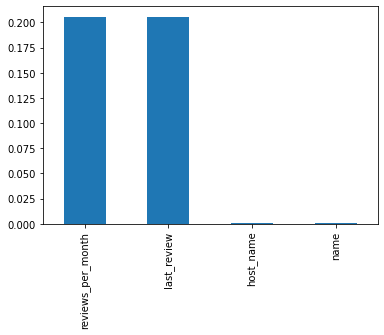

In [14]:
per_missing_values[per_missing_values != 0].plot(kind ='bar')

- Filling null values with zero in review_per_month

In [15]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [16]:
df.drop('last_review', inplace = True, axis =1)

In [17]:
df = df.dropna()
df = df.reset_index(drop = True)

In [18]:
missing_values = df.isna().sum().sort_values(ascending = False)
missing_values

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

- Data Cleaning is done as there are no missing values in the dataset.

In [19]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48853,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48854,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48855,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48856,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- In the above summary of the dataset, the minimum value for price is zero, which is odd. Hence those records should be removed.

In [21]:
df = df[df.price!=0]

In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.884700e+04,4.884700e+04,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000
mean,1.902300e+07,6.763372e+07,40.728945,-73.952176,152.774705,7.012365,23.270621,1.091014,7.149016,112.799599
std,1.098410e+07,7.862959e+07,0.054529,0.046161,240.248498,20.021362,44.550647,1.597200,32.968270,131.615947
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475094e+06,7.814734e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.968202e+07,3.079133e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915833e+07,1.074344e+08,40.763110,-73.936295,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Correlation Matrix

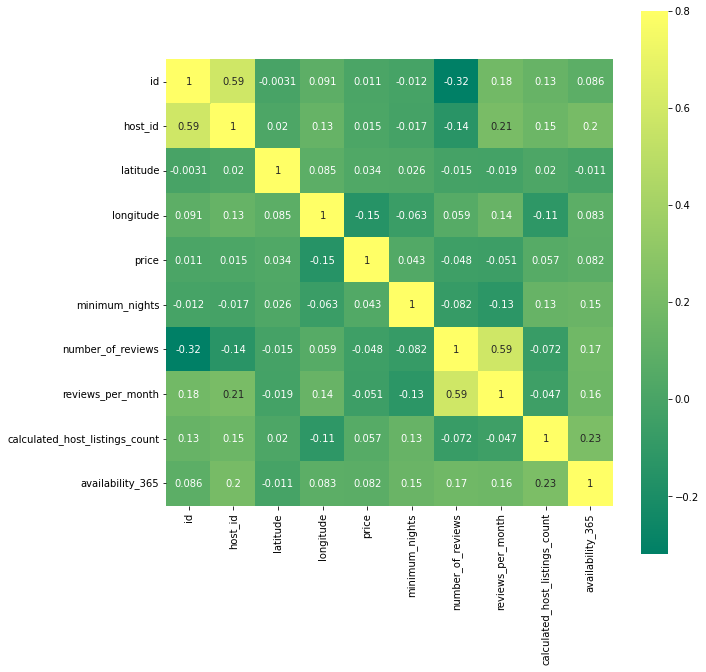

In [23]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, square= True, cmap='summer', annot= True,vmax = 0.8)

From the above heatmap, we can notice that there is no strong correlation except for the
*   number_of_reviews and review_per_month



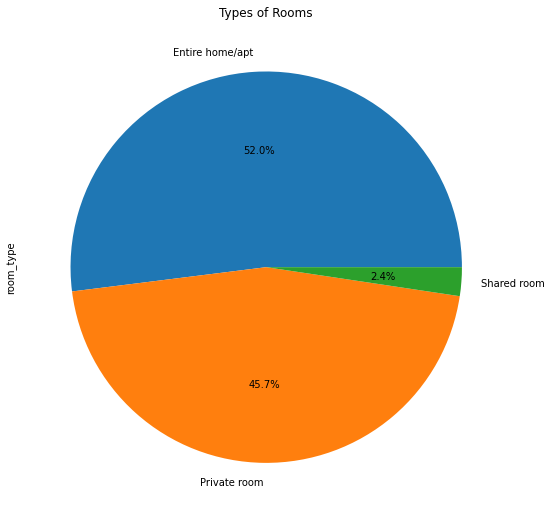

In [24]:
type_of_rooms = df.room_type.value_counts()
plt.title('Types of Rooms' )
type_of_rooms.plot(fontsize = 10, kind ='pie', autopct="%1.1f%%",figsize = (9,9))

In [64]:

map = px.scatter(df,x="latitude", y="longitude", color="room_type", template="plotly_dark", title="AirBNB listings in NYC",width=600,height=400)
map.show(renderers = 'svg')

In [25]:
top_listings = df.name.value_counts().reset_index() #top airbnb listings by count
top_listings.columns = ['Listing_name', 'Number_of_Listngs']
top_10_listings = top_listings[:10]
top_10_listings

,Listing_name,Number_of_Listngs
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Private Room,11
5,Loft Suite @ The Box House Hotel,11
6,Artsy Private BR in Fort Greene Cumberland,10
7,Private room,10
8,Beautiful Brooklyn Brownstone,8
9,Private room in Williamsburg,8


In [26]:
#finding the avg price of the each listing in top_10_listings
a=[]
for i in top_10_listings['Listing_name']:
  price_df = pd.DataFrame(df,columns=['name','price']) 
  price_df = pd.DataFrame(price_df[price_df['name']== i])
  a.append(price_df['price'].mean())

top_10_listings['avg_price']=a
top_10_listings.avg_price = top_10_listings.avg_price.round(2)
top_10_listings


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Listing_name,Number_of_Listngs,avg_price
0,Hillside Hotel,18,141.00
1,Home away from home,17,96.00
2,New york Multi-unit building,16,216.50
3,Brooklyn Apartment,12,95.00
4,Private Room,11,78.09
5,Loft Suite @ The Box House Hotel,11,199.00
6,Artsy Private BR in Fort Greene Cumberland,10,48.00
7,Private room,10,65.40
8,Beautiful Brooklyn Brownstone,8,229.38
9,Private room in Williamsburg,8,85.88


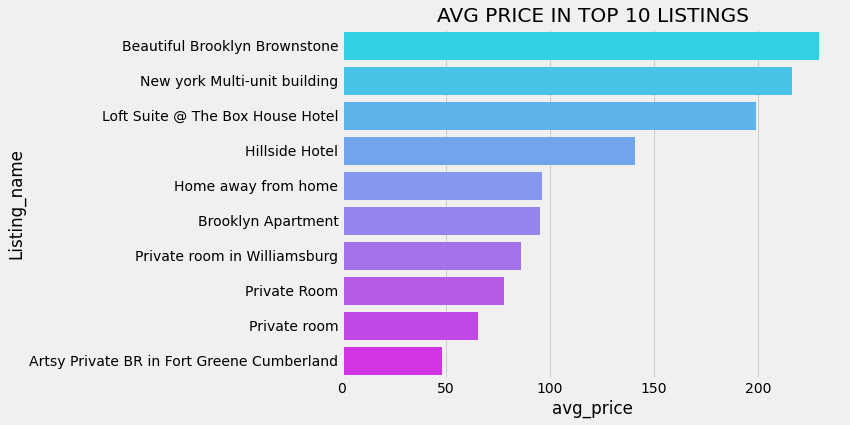

In [27]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.barplot(x='avg_price',y='Listing_name',data =top_10_listings, palette="cool",order=top_10_listings.sort_values('avg_price',ascending=False).Listing_name)
plt.title('AVG PRICE IN TOP 10 LISTINGS')
plt.show()

-Beautiful Brooklyn Brownstone has high avgprice whereas 'Artsy Private BR in Fort Greene Cumberland	' has least avg price

- Entire Home/Apt has high number of listings followed by Private Room Category in the NewYork Area

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


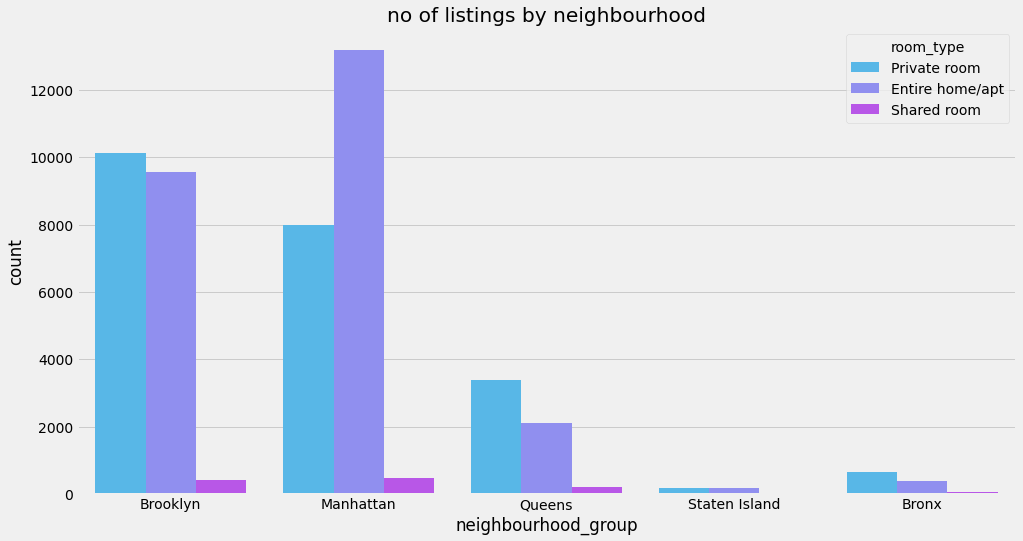

In [28]:
#no of listings by neighbourhood
plt.figure(figsize = (15,8))
plt.title('no of listings by neighbourhood')
sns.countplot(df.neighbourhood_group, x = 'neighbourhod_group', hue = df.room_type, palette='cool')
plt.show()


- Manhattan has high number of listings followed by Brooklyn and Staten has the low number of listings.
- Private Romm Category has high number of listings followed by Entire home/ apt category in all the neighbourhood groups except for the Manhattan where the number of listings are vice-versa.
-Shared Room has the low number of listings in all the neighbourhood groups.

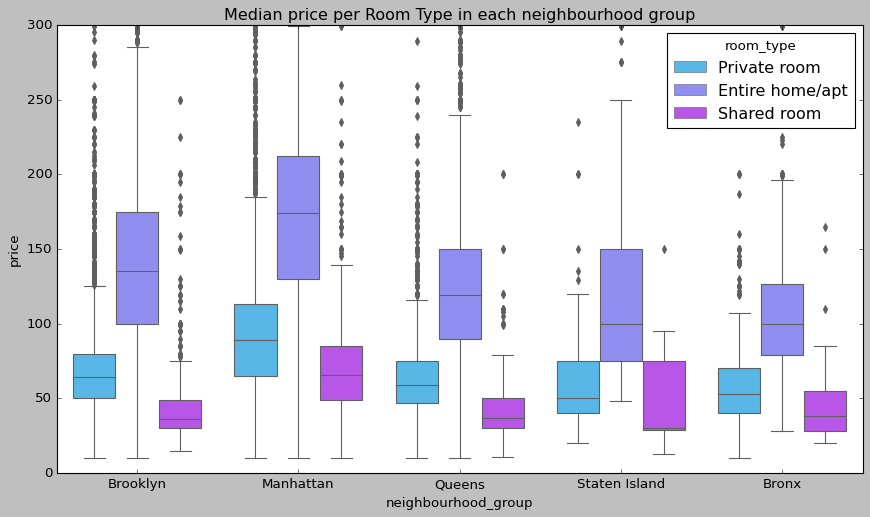

In [29]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Median price per Room Type in each neighbourhood group")
sns.boxplot(y="price",x ='neighbourhood_group',hue= df.room_type ,data = df[df.price<300],palette='cool')
plt.show()

- From the above visualization, Manhattan is the most expensive neighbour_hood group in all the 3 categories.

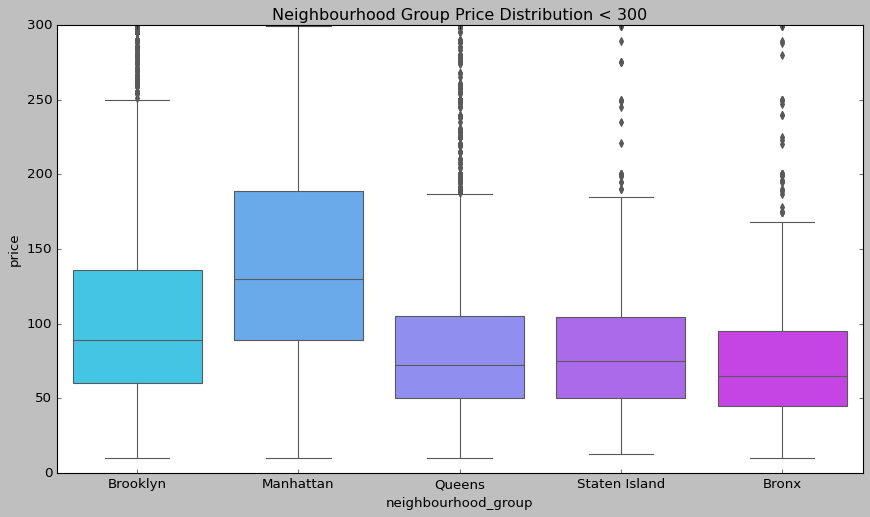

In [30]:
#avg price per neighbourhood_group
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 300")
sns.boxplot(y="price",x ='neighbourhood_group',data = df[df.price<300],palette='cool')
plt.show()

- Manhattan has a median price of around 130$ per night

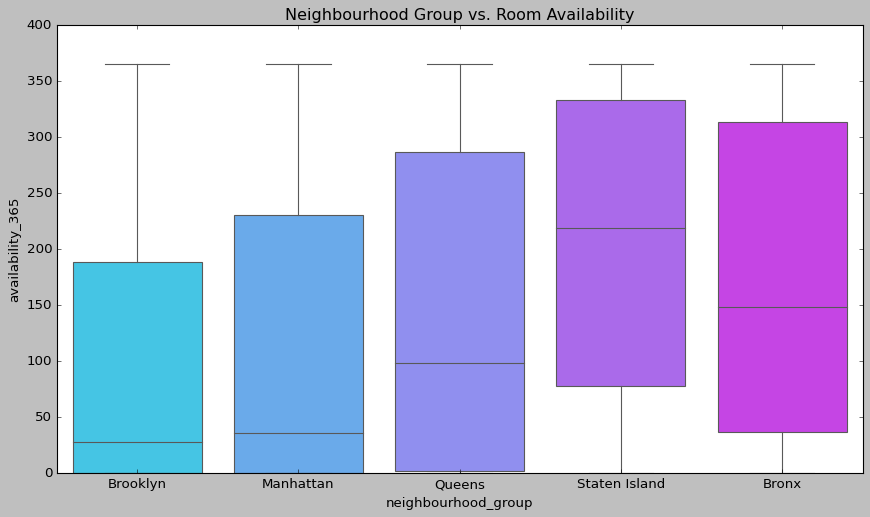

In [31]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Room Availability")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="cool")
plt.show()

- Staten Island has high room availability despite having the low number of listings and Brooklyn has the lowest romm availability

---



- Avg price of avaiable room in NYC

In [37]:
avg_airbnb_price = df.price.mean()
print("The average airbnb price across NYC is ${:.2f}".format(avg_airbnb_price))

The average bnb room price across all of NY is $152.77


Avg price of each airbnb room type 

In [52]:
room_price_df = df[['room_type','price']]
private_room_df = room_price_df[room_price_df.room_type== "Private room"]
avg_private_room_price = private_room_df.price.mean()
entire_home_df = room_price_df[room_price_df.room_type == "Entire home/apt"]
avg_home_price = entire_home_df.price.mean()
shared_room_df = room_price_df[room_price_df.room_type == "Shared room"]
avg_shared_room_price = shared_room_df.price.mean()



print("The AVG Private room price in NYC is ${:.2f}".format(avg_private_room_price))
print("The AVG Entire Home/Apt price in NYC is ${:.2f}".format(avg_home_price))
print("The AVG Shared room price in NYC is ${:.2f}".format(avg_shared_room_price))

The AVG Private room price in NYC is $89.82
The AVG Entire Home/Apt price in NYC is $211.82
The AVG Shared room price in NYC is $70.20


In [56]:
#scatter plot room availabilty


room_availability = px.scatter(df, x="neighbourhood", y="price", color = "room_type", 
                                       title="Avialability of AirBNB", template="plotly_dark")
room_availability.show()